# **Capstone project proposal to predict credit card approval.**

**1.Why is your proposal important in today’s world? How predicting a good
client is worthy for a bank?**

**A.In today's world, efficiency is key for banks. My proposal streamlines operations by accurately predicting good clients, reducing risks, ensuring regulatory compliance, and enhancing overall profitability. It's a crucial tool for maintaining a competitive edge in the dynamic landscape of modern banking.**



**2. How is it going to impact the banking sector?**

**A. predicting a good client means faster decisions, lower risks, and overall stronger financial health for banks, creating a more stable and competitive banking landscape.**

**3.If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.**

**A.The knowledge gap in credit card approval for banks often lies in effectively evaluating the creditworthiness, My method adapts by integrating local data, bridging the knowledge divide, and ensuring future-ready, effective tools for Indian banks.**

**4.What approach are you going to take in order to prove or disprove your hypothesis?**

**A. I'll gather diverse client data, including financial history and behavior. Using machine learning models, I'll analyze patterns to predict credit card approval.**

**5.What feature engineering techniques will be relevant to your project?**

**A.Variable Transformation: Convert skewed variables to ensure a normal distribution.
Scaling: Standardize numerical features for uniform impact in the model.
One-Hot Encoding: Convert categorical variables into binary vectors for model compatibility.
Interaction Features: Introduce new features capturing interactions between existing variables.
Missing Value Imputation: Address missing data through appropriate imputation methods.**

**6.Please justify your data analysis approach.**

**A.Our data analysis approach focuses on leveraging advanced statistical and machine learning techniques to uncover patterns and relationships within the dataset.**

**7.Identify important patterns in your data using the EDA approach to justify your findings.**

**A.Exploratory Data Analysis (EDA) will be crucial to uncovering significant patterns in my data. By visualizing and analyzing various features, I aim to identify correlations, outliers. This process ensures a data-driven understanding, laying the foundation for effective predictive modeling in credit card approval scenarios.**

**8.What method will you use for machine learning based predictions for credit card approval?**

**A.I will use a supervised learning approach, specifically a classification algorithm, for machine learning-based predictions in credit card approval**

**9.Please justify the most appropriate model.**


**A.various classification algorithms based on metrics like accuracy, precision, and recall.credit approval, an ensemble method like Random Forest.**

**10.Please perform necessary steps required to improve the accuracy of your model.**

**A.Feature Engineering, Hyperparameter Tuning, Cross-Validation, Handling Imbalance data, Data Augmentation, and Feature Scaling.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# **Data Import**

In [2]:
df1=pd.read_csv('Credit_card.csv')
df2=pd.read_csv('Credit_card_label.csv')

In [3]:
df=pd.merge(df1, df2, on='Ind_ID')

In [4]:
df.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  label  
0             NaN               2      1  
1             NaN               2      1  
2             NaN               2      1  
3             NaN               2      1  
4             NaN               2      1

In [5]:
df.tail()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
1543  5028645      F         N             Y         0            NaN   
1544  5023655      F         N             N         0       225000.0   
1545  5115992      M         Y             Y         2       180000.0   
1546  5118219      M         Y             N         0       270000.0   
1547  5053790      F         Y             Y         0       225000.0   

               Type_Income                      EDUCATION  \
1543  Commercial associate               Higher education   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            Marital_status       Housing_type  Birthday_count  Employed_days  \
1543               Married  House / apartment        -11957.0          -2182   
1544  Single / not married  House / apartment        -10229.0          -1209   
1545               Married  House / apartment        -13174.0          -2477   
1546        Civil marriage  House / apartment        -15292.0           -645   
1547               Married  House / apartment        -16601.0          -2859   

      Mobile_phone  Work_Phone  Phone  EMAIL_ID Type_Occupation  \
1543             1           0      0         0        Managers   
1544             1           0      0         0     Accountants   
1545             1           0      0         0        Managers   
1546             1           1      1         0         Drivers   
1547             1           0      0         0             NaN   

      Family_Members  label  
1543               2      0  
1544               1      0  
1545               4      0  
1546               2      0  
1547               2      0

# **This dataset looks like possibly related to individuals and their attributes. Each row appears to represent a person, and there are various columns describing characteristics such as gender, car ownership, property ownership, children, annual income, education, marital status, etc.**

In [6]:
df.shape

(1548, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

# **cats represents categagorical varibles, nums represents numerical variables**

In [8]:
cats=[]
nums=[]

for i in df.columns:
    if df[i].dtype == 'O':
      cats.append(i)
    else:
      nums.append(i)

In [9]:
print(cats)
print(nums)

['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation']
['Ind_ID', 'CHILDREN', 'Annual_income', 'Birthday_count', 'Employed_days', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members', 'label']


In [10]:
df[cats].head()

GENDER Car_Owner Propert_Owner           Type_Income         EDUCATION  \
0      M         Y             Y             Pensioner  Higher education   
1      F         Y             N  Commercial associate  Higher education   
2      F         Y             N  Commercial associate  Higher education   
3      F         Y             N  Commercial associate  Higher education   
4      F         Y             N  Commercial associate  Higher education   

  Marital_status       Housing_type Type_Occupation  
0        Married  House / apartment             NaN  
1        Married  House / apartment             NaN  
2        Married  House / apartment             NaN  
3        Married  House / apartment             NaN  
4        Married  House / apartment             NaN

In [11]:
df[nums].tail()

Ind_ID  CHILDREN  Annual_income  Birthday_count  Employed_days  \
1543  5028645         0            NaN        -11957.0          -2182   
1544  5023655         0       225000.0        -10229.0          -1209   
1545  5115992         2       180000.0        -13174.0          -2477   
1546  5118219         0       270000.0        -15292.0           -645   
1547  5053790         0       225000.0        -16601.0          -2859   

      Mobile_phone  Work_Phone  Phone  EMAIL_ID  Family_Members  label  
1543             1           0      0         0               2      0  
1544             1           0      0         0               1      0  
1545             1           0      0         0               4      0  
1546             1           1      1         0               2      0  
1547             1           0      0         0               2      0

In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

# ** comes under the percentage, df.shape[0] here we mention 0 for Null values for coulums of dataset**

In [14]:
round(df.isnull().sum() / df.shape[0] *100,2).sort_values(ascending=False)

Type_Occupation    31.52
Annual_income       1.49
Birthday_count      1.42
GENDER              0.45
Ind_ID              0.00
Employed_days       0.00
Family_Members      0.00
EMAIL_ID            0.00
Phone               0.00
Work_Phone          0.00
Mobile_phone        0.00
Housing_type        0.00
Marital_status      0.00
EDUCATION           0.00
Type_Income         0.00
CHILDREN            0.00
Propert_Owner       0.00
Car_Owner           0.00
label               0.00
dtype: float64

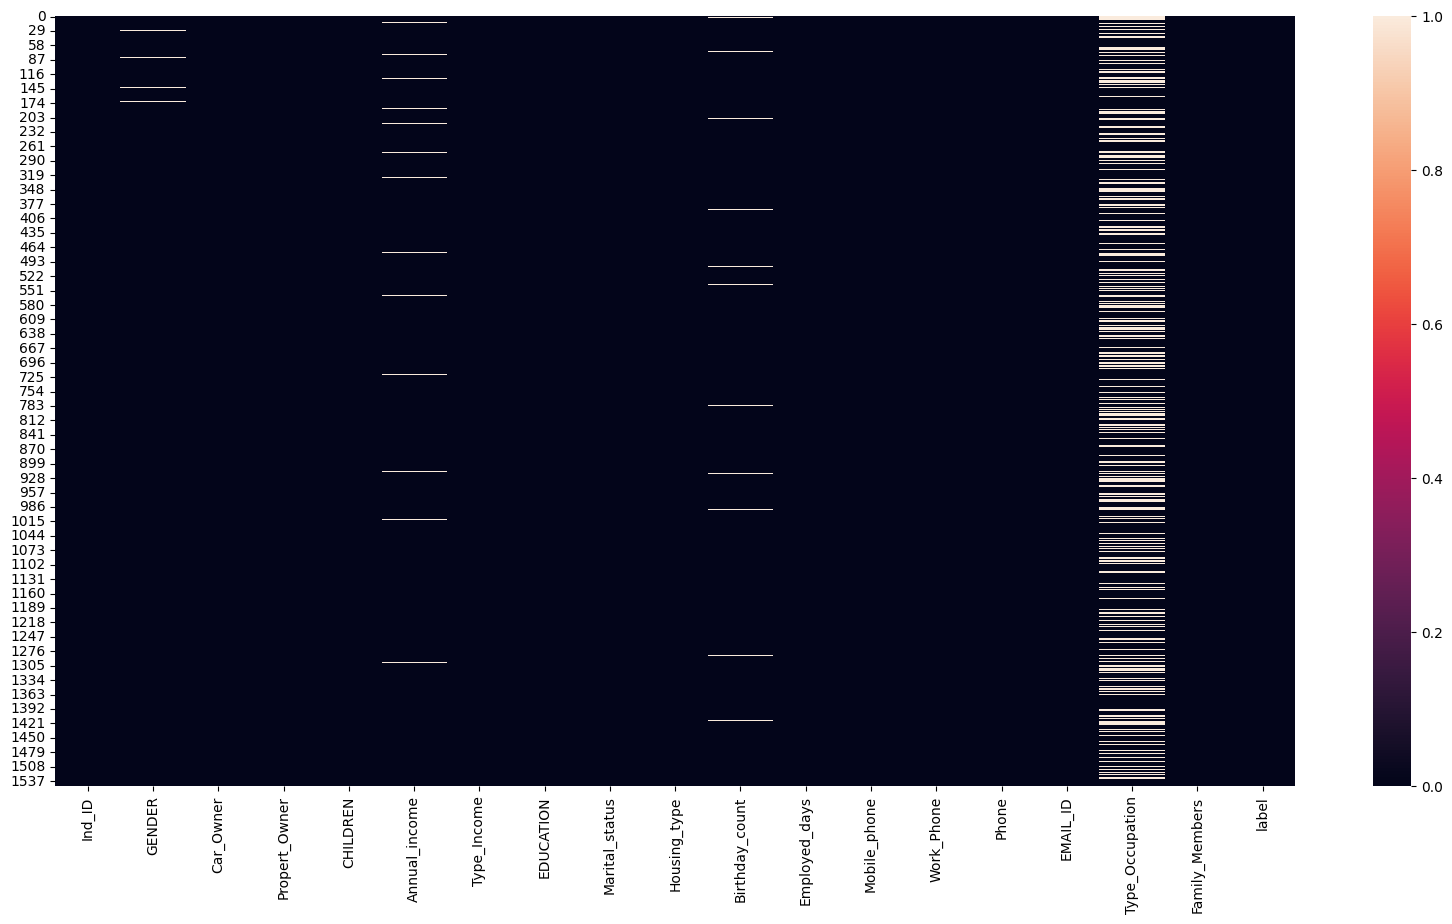

In [15]:
# visuvalli looking null values

plt.figure(figsize=(20,10))
sns.heatmap(df.isnull());

# **children and Family_members having strong relation**

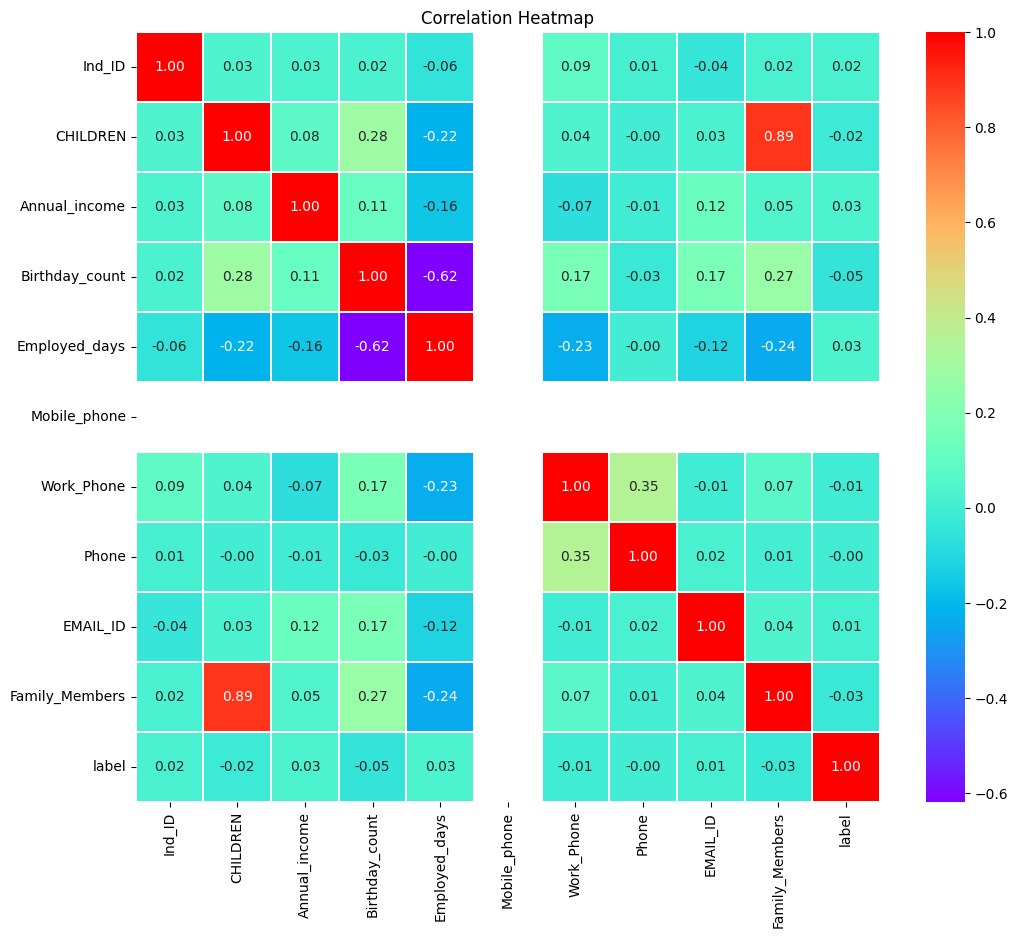

In [16]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow', fmt='.2f', linewidths=0.2)
plt.title('Correlation Heatmap')
plt.show()

# The dataset contains information about individuals, including demographic, financial, and personal attributes.
# Missing values are present in the GENDER and Annual_income columns.
# Most individuals do not own a car but own property.
# Education level is predominantly 'Secondary / secondary special', and marital status is predominantly 'Married'.
# The distribution of employment days is diverse, with potential anomalies or placeholders.
# The target variable (label) indicates that credit card approval is not common, with about 11% approval.

In [17]:
df.describe(include='all').T   # here all variables data, and T is transpose()

count unique                            top  freq  \
Ind_ID           1548.0    NaN                            NaN   NaN   
GENDER             1541      2                              F   973   
Car_Owner          1548      2                              N   924   
Propert_Owner      1548      2                              Y  1010   
CHILDREN         1548.0    NaN                            NaN   NaN   
Annual_income    1525.0    NaN                            NaN   NaN   
Type_Income        1548      4                        Working   798   
EDUCATION          1548      5  Secondary / secondary special  1031   
Marital_status     1548      5                        Married  1049   
Housing_type       1548      6              House / apartment  1380   
Birthday_count   1526.0    NaN                            NaN   NaN   
Employed_days    1548.0    NaN                            NaN   NaN   
Mobile_phone     1548.0    NaN                            NaN   NaN   
Work_Phone       1548.0    NaN                            NaN   NaN   
Phone            1548.0    NaN                            NaN   NaN   
EMAIL_ID         1548.0    NaN                            NaN   NaN   
Type_Occupation    1060     18                       Laborers   268   
Family_Members   1548.0    NaN                            NaN   NaN   
label            1548.0    NaN                            NaN   NaN   

                           mean            std        min         25%  \
Ind_ID           5078920.351421   41717.587742  5008827.0  5045069.75   
GENDER                      NaN            NaN        NaN         NaN   
Car_Owner                   NaN            NaN        NaN         NaN   
Propert_Owner               NaN            NaN        NaN         NaN   
CHILDREN               0.412791       0.776691        0.0         0.0   
Annual_income      191399.32623  113252.997656    33750.0    121500.0   
Type_Income                 NaN            NaN        NaN         NaN   
EDUCATION                   NaN            NaN        NaN         NaN   
Marital_status              NaN            NaN        NaN         NaN   
Housing_type                NaN            NaN        NaN         NaN   
Birthday_count    -16040.342071    4229.503202   -24946.0    -19553.0   
Employed_days      59364.689922  137808.062701   -14887.0     -3174.5   
Mobile_phone                1.0            0.0        1.0         1.0   
Work_Phone              0.20801       0.406015        0.0         0.0   
Phone                  0.309432       0.462409        0.0         0.0   
EMAIL_ID               0.092377       0.289651        0.0         0.0   
Type_Occupation             NaN            NaN        NaN         NaN   
Family_Members         2.161499       0.947772        1.0         2.0   
label                  0.113049       0.316755        0.0         0.0   

                       50%        75%        max  
Ind_ID           5078841.5  5115673.0  5150412.0  
GENDER                 NaN        NaN        NaN  
Car_Owner              NaN        NaN        NaN  
Propert_Owner          NaN        NaN        NaN  
CHILDREN               0.0        1.0       14.0  
Annual_income     166500.0   225000.0  1575000.0  
Type_Income            NaN        NaN        NaN  
EDUCATION              NaN        NaN        NaN  
Marital_status         NaN        NaN        NaN  
Housing_type           NaN        NaN        NaN  
Birthday_count    -15661.5   -12417.0    -7705.0  
Employed_days      -1565.0    -431.75   365243.0  
Mobile_phone           1.0        1.0        1.0  
Work_Phone             0.0        0.0        1.0  
Phone                  0.0        1.0        1.0  
EMAIL_ID               0.0        0.0        1.0  
Type_Occupation        NaN        NaN        NaN  
Family_Members         2.0        3.0       15.0  
label                  0.0        0.0        1.0

# Based on the provided code, dropping three columns from the DataFrame (df).

In [18]:
columns_to_drop = ['Ind_ID', 'EMAIL_ID', 'Mobile_phone']


columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df.drop(columns=columns_to_drop, inplace=True)

In [19]:
df.head()

GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0      M         Y             Y         0       180000.0   
1      F         Y             N         0       315000.0   
2      F         Y             N         0       315000.0   
3      F         Y             N         0            NaN   
4      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Work_Phone  Phone Type_Occupation  \
0        -18772.0         365243           0      0             NaN   
1        -13557.0           -586           1      1             NaN   
2             NaN           -586           1      1             NaN   
3        -13557.0           -586           1      1             NaN   
4        -13557.0           -586           1      1             NaN   

   Family_Members  label  
0               2      1  
1               2      1  
2               2      1  
3               2      1  
4               2      1

In [20]:
cats=[]
nums=[]

for i in df.columns:
    if df[i].dtype == 'O':
      cats.append(i)
    else:
      nums.append(i)

In [21]:
print(cats)
print(nums)

['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation']
['CHILDREN', 'Annual_income', 'Birthday_count', 'Employed_days', 'Work_Phone', 'Phone', 'Family_Members', 'label']


# Distplot represents the overall distribution of continuous data variables.

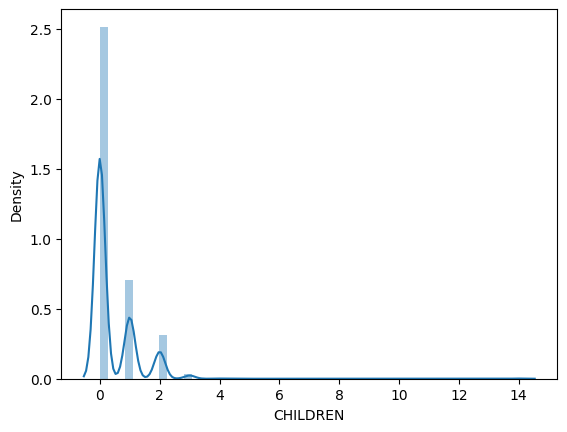

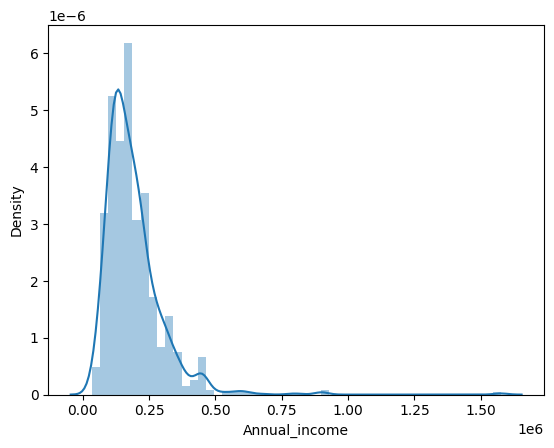

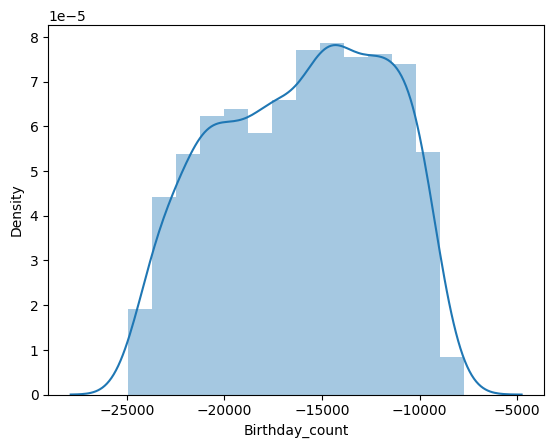

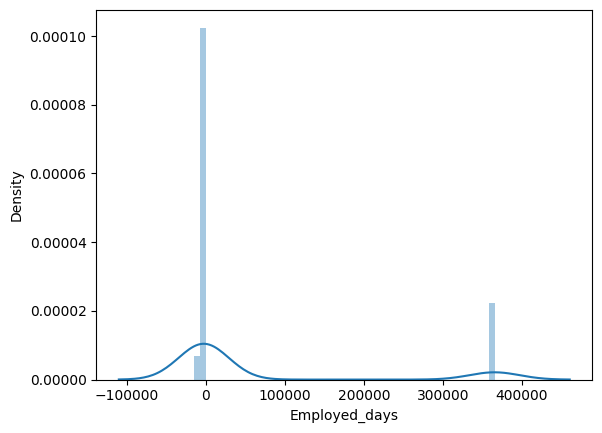

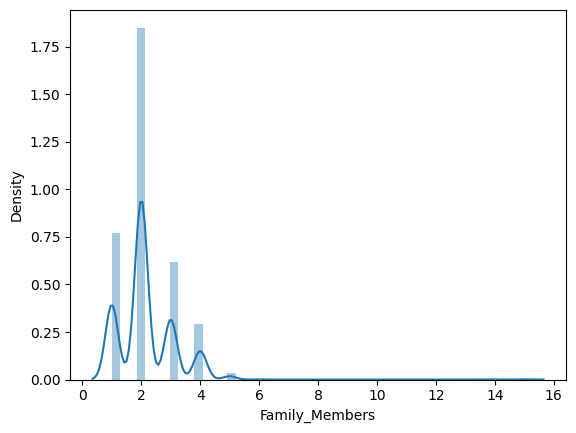

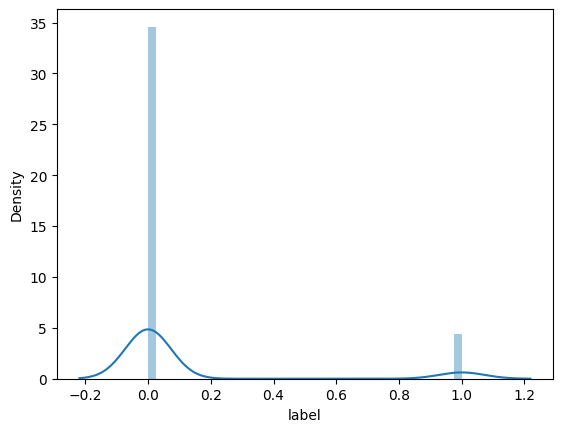

In [22]:
# distplot is useing for numarical columns

for i in nums:
  sns.distplot(df[i])
  plt.show()

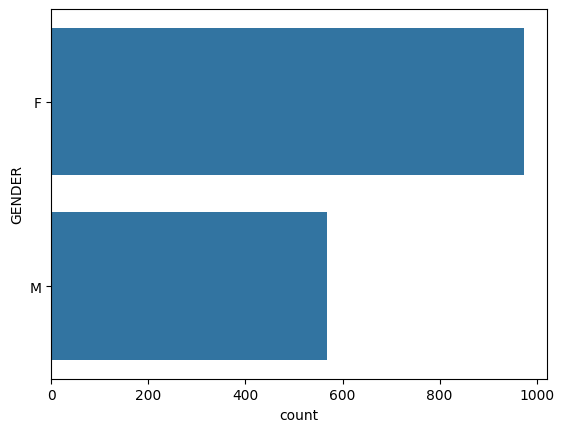

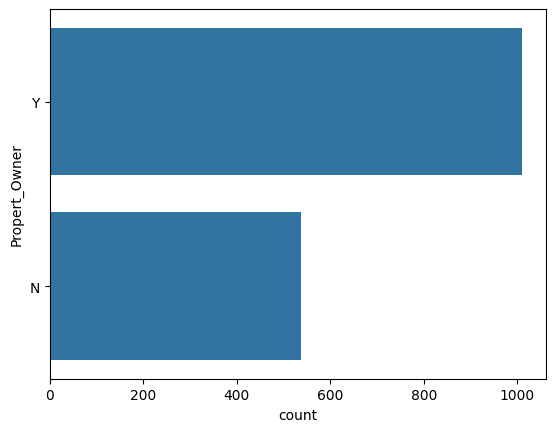

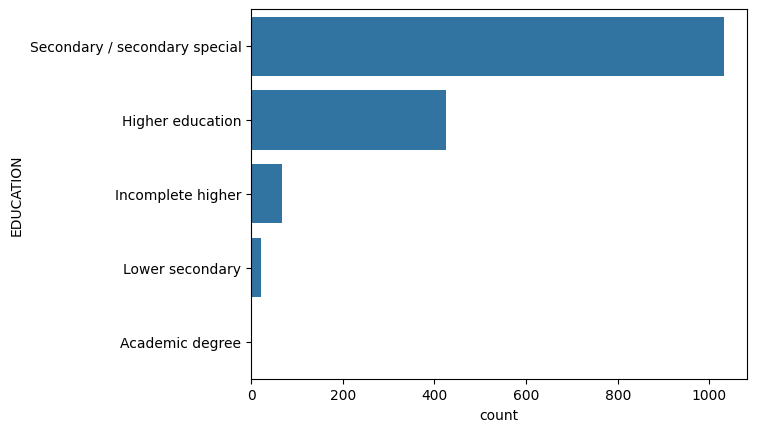

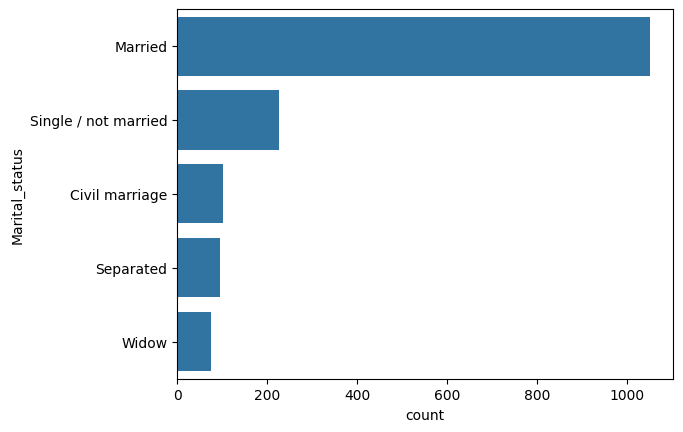

In [23]:
# distplot is useing for categorical columns

for i in cats:
  sns.countplot(df[i], order = df[i].value_counts().index)
  plt.show()

In [24]:
sns.pairplot(data=df, hue='label', corner=True)

In [25]:
#Outlier handling

abnormal_value=["CHILDREN","Annual_income","Birthday_count","Employed_days","Family_Members"]

fig,axes=plt.subplots(nrows=len(abnormal_value),figsize=(10,8))

for i,col in enumerate(abnormal_value,1):
    plt.subplot(2,3,i)
    sns.boxplot(x="label",y=col,data=df)
    plt.title(f"boxplot of {col}")
plt.tight_layout()
plt.show()

# Filling the null values in Annual_income column with median, and Gender column filling the null values with mode

In [26]:
df['Annual_income'].fillna(df['Annual_income'].median(), inplace=True)

In [27]:
df['GENDER'].fillna(df['GENDER'].mode().iloc[0], inplace=True)


In [28]:
df.head()

GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0      M         Y             Y         0       180000.0   
1      F         Y             N         0       315000.0   
2      F         Y             N         0       315000.0   
3      F         Y             N         0       166500.0   
4      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Work_Phone  Phone Type_Occupation  \
0        -18772.0         365243           0      0             NaN   
1        -13557.0           -586           1      1             NaN   
2             NaN           -586           1      1             NaN   
3        -13557.0           -586           1      1             NaN   
4        -13557.0           -586           1      1             NaN   

   Family_Members  label  
0               2      1  
1               2      1  
2               2      1  
3               2      1  
4               2      1

# Percentage of null values in dataset

In [29]:
round(df.isnull().sum() / df.shape[0] *100,2).sort_values(ascending=False)

Type_Occupation    31.52
Birthday_count      1.42
GENDER              0.00
Car_Owner           0.00
Propert_Owner       0.00
CHILDREN            0.00
Annual_income       0.00
Type_Income         0.00
EDUCATION           0.00
Marital_status      0.00
Housing_type        0.00
Employed_days       0.00
Work_Phone          0.00
Phone               0.00
Family_Members      0.00
label               0.00
dtype: float64

# Here I am visuallizing heatmap, relation between the Type_Occupation and Type_Income

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(df['Type_Occupation'], df['Type_Income']), annot=True, cmap='coolwarm', fmt='g')
plt.show()

# Type_Occupation having more null values are there in the dataset,

In [31]:
df['Type_Occupation'].isnull().sum()

488

In [32]:
df['Type_Occupation'].value_counts()

Laborers                 268
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Secretaries                9
Low-skill Laborers         9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: Type_Occupation, dtype: int64

# In below code I am replacing the 'NaN' value in the place of (365243) because this value is very high and What I observed this value is not suitable for this column

In [33]:
df['Employed_days'].replace(365243, np.nan, inplace=True)

# filling the null vaues in the 'Employed_days' column

In [34]:
median_employed_days = df['Employed_days'].median()

df['Employed_days'].fillna(median_employed_days, inplace=True)

# filling the null vaues in "Birthday_count" whith mean()

In [35]:
mean_employed_days = df['Birthday_count'].mean()

df['Birthday_count'].fillna(mean_employed_days, inplace=True)

# converting the Birthday_count into years, creating new column " Age "Assuming the column represents days, considering leap years

In [36]:

df['Birthday_count'] = df['Birthday_count'].abs()

df['Age'] = df['Birthday_count'] / 365.25  # Assuming the column represents days, considering leap years

df['Age'] = df['Age'].round().astype(int)


# converting the Employed_days into years, creating new column " Employed_Years "Assuming the column represents days, considering leap years

In [37]:
df['Employed_days'] = df['Employed_days'].abs()

df['Employed_years'] = df['Employed_days'] / 365.25  # Assuming the column represents days, considering leap years

df['Employed_years'] = df['Employed_years'].round().astype(int)

# I am droping the two columns "Birthday_count, Employed_days"

In [38]:
df = df.drop(['Birthday_count', 'Employed_days'], axis=1)

In [39]:
df.head()

GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0      M         Y             Y         0       180000.0   
1      F         Y             N         0       315000.0   
2      F         Y             N         0       315000.0   
3      F         Y             N         0       166500.0   
4      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Work_Phone  Phone Type_Occupation  Family_Members  label  Age  \
0           0      0             NaN               2      1   51   
1           1      1             NaN               2      1   37   
2           1      1             NaN               2      1   44   
3           1      1             NaN               2      1   37   
4           1      1             NaN               2      1   37   

   Employed_years  
0               5  
1               2  
2               2  
3               2  
4               2

# Almost all null values done, remaining " Type_Occupation " column only

In [40]:
round(df.isnull().sum() / df.shape[0] *100,2).sort_values(ascending=False)

Type_Occupation    31.52
GENDER              0.00
Car_Owner           0.00
Propert_Owner       0.00
CHILDREN            0.00
Annual_income       0.00
Type_Income         0.00
EDUCATION           0.00
Marital_status      0.00
Housing_type        0.00
Work_Phone          0.00
Phone               0.00
Family_Members      0.00
label               0.00
Age                 0.00
Employed_years      0.00
dtype: float64

In [41]:
df['Type_Occupation'].value_counts().sort_values(ascending=False).head(20)

Laborers                 268
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Secretaries                9
Low-skill Laborers         9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: Type_Occupation, dtype: int64

# Dividing the two different types ordinal and nominal

In [42]:
ordinal = ['EDUCATION']
nominal = ['GENDER', 'Car_Owner', 'Propert_Owner']

In [43]:
df['EDUCATION'].value_counts()

Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: EDUCATION, dtype: int64

# Here in " EDUCATION " column I am converting into categorical to numerical

In [44]:
mapper = {
    'Incomplete higher': 1,
    'Secondary / secondary special': 2,
    'Higher education': 3,
    'Lower secondary': 4,
    'Academic degree': 5,

}

df['EDUCATION'].replace(mapper, inplace=True)

df.head()

GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0      M         Y             Y         0       180000.0   
1      F         Y             N         0       315000.0   
2      F         Y             N         0       315000.0   
3      F         Y             N         0       166500.0   
4      F         Y             N         0       315000.0   

            Type_Income  EDUCATION Marital_status       Housing_type  \
0             Pensioner          3        Married  House / apartment   
1  Commercial associate          3        Married  House / apartment   
2  Commercial associate          3        Married  House / apartment   
3  Commercial associate          3        Married  House / apartment   
4  Commercial associate          3        Married  House / apartment   

   Work_Phone  Phone Type_Occupation  Family_Members  label  Age  \
0           0      0             NaN               2      1   51   
1           1      1             NaN               2      1   37   
2           1      1             NaN               2      1   44   
3           1      1             NaN               2      1   37   
4           1      1             NaN               2      1   37   

   Employed_years  
0               5  
1               2  
2               2  
3               2  
4               2

In [45]:
nominal

['GENDER', 'Car_Owner', 'Propert_Owner']

# ['GENDER', 'Car_Owner', 'Propert_Owner'] columns, I am using get_dummies for converting categoricals to numaricals,

# Here above columns only two categories are there (" Y ", " N "), and droping one column, beacuse yes alredy there, for N not need to, machine will understand if yes is there other one is N only

In [46]:
dummies_encoded=pd.get_dummies(df[nominal], drop_first=True)
dummies_encoded.head()

GENDER_M  Car_Owner_Y  Propert_Owner_Y
0         1            1                1
1         0            1                0
2         0            1                0
3         0            1                0
4         0            1                0

# Here I am assigning the name for dataset " final_df_nominal_2 ", after applying get_dummies

In [47]:
final_df_nominal_2=pd.concat([df.drop(columns=['GENDER', 'Car_Owner', 'Propert_Owner']), dummies_encoded], axis=1)

final_df_nominal_2.head()

CHILDREN  Annual_income           Type_Income  EDUCATION Marital_status  \
0         0       180000.0             Pensioner          3        Married   
1         0       315000.0  Commercial associate          3        Married   
2         0       315000.0  Commercial associate          3        Married   
3         0       166500.0  Commercial associate          3        Married   
4         0       315000.0  Commercial associate          3        Married   

        Housing_type  Work_Phone  Phone Type_Occupation  Family_Members  \
0  House / apartment           0      0             NaN               2   
1  House / apartment           1      1             NaN               2   
2  House / apartment           1      1             NaN               2   
3  House / apartment           1      1             NaN               2   
4  House / apartment           1      1             NaN               2   

   label  Age  Employed_years  GENDER_M  Car_Owner_Y  Propert_Owner_Y  
0      1   51               5         1            1                1  
1      1   37               2         0            1                0  
2      1   44               2         0            1                0  
3      1   37               2         0            1                0  
4      1   37               2         0            1                0

In [48]:
final_df_nominal_2['Type_Income'].value_counts()

Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: Type_Income, dtype: int64

In [49]:
final_df_nominal_2['Marital_status'].value_counts()

Married                 1049
Single / not married     227
Civil marriage           101
Separated                 96
Widow                     75
Name: Marital_status, dtype: int64

In [50]:
final_df_nominal_2['Housing_type'].value_counts()

House / apartment      1380
With parents             80
Municipal apartment      53
Rented apartment         21
Office apartment          9
Co-op apartment           5
Name: Housing_type, dtype: int64

In [51]:
final_df_nominal_2.head()

CHILDREN  Annual_income           Type_Income  EDUCATION Marital_status  \
0         0       180000.0             Pensioner          3        Married   
1         0       315000.0  Commercial associate          3        Married   
2         0       315000.0  Commercial associate          3        Married   
3         0       166500.0  Commercial associate          3        Married   
4         0       315000.0  Commercial associate          3        Married   

        Housing_type  Work_Phone  Phone Type_Occupation  Family_Members  \
0  House / apartment           0      0             NaN               2   
1  House / apartment           1      1             NaN               2   
2  House / apartment           1      1             NaN               2   
3  House / apartment           1      1             NaN               2   
4  House / apartment           1      1             NaN               2   

   label  Age  Employed_years  GENDER_M  Car_Owner_Y  Propert_Owner_Y  
0      1   51               5         1            1                1  
1      1   37               2         0            1                0  
2      1   44               2         0            1                0  
3      1   37               2         0            1                0  
4      1   37               2         0            1                0

# Encoding

# Assuming your dataset is stored in a variable named 'final_df_nominal_2'
# Replace 'Type_Income', 'Marital_status', and 'Housing_type' with the actual column names if they are different in your dataset

# " OneHotEncoder " I am using for this coulumns.

# 'Type_Income', 'Marital_status', and 'Housing_type' before layers also I droped from the 'final_df_nominal_2' this dataset

In [52]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Extract the 'Type_Income', 'Marital_status', and 'Housing_type' columns and reshape them for OneHotEncoder
type_income_column = final_df_nominal_2['Type_Income'].values.reshape(-1, 1)
marital_status_column = final_df_nominal_2['Marital_status'].values.reshape(-1, 1)
housing_type_column = final_df_nominal_2['Housing_type'].values.reshape(-1, 1)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')

type_income_encoded = encoder.fit_transform(type_income_column)
type_income_categories = encoder.get_feature_names_out(['Type_Income'])
type_income_encoded_df = pd.DataFrame(type_income_encoded, columns=type_income_categories)

marital_status_encoded = encoder.fit_transform(marital_status_column)
marital_status_categories = encoder.get_feature_names_out(['Marital_status'])
marital_status_encoded_df = pd.DataFrame(marital_status_encoded, columns=marital_status_categories)

housing_type_encoded = encoder.fit_transform(housing_type_column)
housing_type_categories = encoder.get_feature_names_out(['Housing_type'])
housing_type_encoded_df = pd.DataFrame(housing_type_encoded, columns=housing_type_categories)

# Concatenate the one-hot encoded DataFrames with the original DataFrame
final_df_encoded = pd.concat([final_df_nominal_2, type_income_encoded_df, marital_status_encoded_df, housing_type_encoded_df], axis=1)

# Drop the original 'Type_Income', 'Marital_status', and 'Housing_type' columns, as they are no longer needed
final_df_encoded = final_df_encoded.drop(['Type_Income', 'Marital_status', 'Housing_type'], axis=1)

# Display the updated dataset
print(final_df_encoded.head())


   CHILDREN  Annual_income  EDUCATION  Work_Phone  Phone Type_Occupation  \
0         0       180000.0          3           0      0             NaN   
1         0       315000.0          3           1      1             NaN   
2         0       315000.0          3           1      1             NaN   
3         0       166500.0          3           1      1             NaN   
4         0       315000.0          3           1      1             NaN   

   Family_Members  label  Age  Employed_years  ...  Type_Income_Working  \
0               2      1   51               5  ...                  0.0   
1               2      1   37               2  ...                  0.0   
2               2      1   44               2  ...                  0.0   
3               2      1   37               2  ...                  0.0   
4               2      1   37               2  ...                  0.0   

   Marital_status_Married  Marital_status_Separated  \
0                     1.0            

# DataFrame is named " final_df_encoded " and below codes I Observed, HOw many columns creating

In [53]:
housing_type_columns = final_df_encoded.filter(like='Housing_type').columns
housing_type_column_count = len(housing_type_columns)

print("Number of columns containing 'Housing_type':", housing_type_column_count)
print("Columns containing 'Housing_type':", housing_type_columns)


Number of columns containing 'Housing_type': 5
Columns containing 'Housing_type': Index(['Housing_type_House / apartment', 'Housing_type_Municipal apartment',
       'Housing_type_Office apartment', 'Housing_type_Rented apartment',
       'Housing_type_With parents'],
      dtype='object')


In [54]:
marital_status_columns = final_df_encoded.filter(like='Marital_status').columns
marital_status_column_count = len(marital_status_columns)

type_income_columns = final_df_encoded.filter(like='Type_Income').columns
type_income_column_count = len(type_income_columns)

print("Number of columns containing 'Marital_status':", marital_status_column_count)
print("Columns containing 'Marital_status':", marital_status_columns)

print("\nNumber of columns containing 'Type_Income':", type_income_column_count)
print("Columns containing 'Type_Income':", type_income_columns)


Number of columns containing 'Marital_status': 4
Columns containing 'Marital_status': Index(['Marital_status_Married', 'Marital_status_Separated',
       'Marital_status_Single / not married', 'Marital_status_Widow'],
      dtype='object')

Number of columns containing 'Type_Income': 3
Columns containing 'Type_Income': Index(['Type_Income_Pensioner', 'Type_Income_State servant',
       'Type_Income_Working'],
      dtype='object')


In [55]:
print(final_df_encoded.head())

   CHILDREN  Annual_income  EDUCATION  Work_Phone  Phone Type_Occupation  \
0         0       180000.0          3           0      0             NaN   
1         0       315000.0          3           1      1             NaN   
2         0       315000.0          3           1      1             NaN   
3         0       166500.0          3           1      1             NaN   
4         0       315000.0          3           1      1             NaN   

   Family_Members  label  Age  Employed_years  ...  Type_Income_Working  \
0               2      1   51               5  ...                  0.0   
1               2      1   37               2  ...                  0.0   
2               2      1   44               2  ...                  0.0   
3               2      1   37               2  ...                  0.0   
4               2      1   37               2  ...                  0.0   

   Marital_status_Married  Marital_status_Separated  \
0                     1.0            

# here we have " Type_Occupation " only having null values.

In [56]:
final_df_encoded.isnull().sum()

CHILDREN                                 0
Annual_income                            0
EDUCATION                                0
Work_Phone                               0
Phone                                    0
Type_Occupation                        488
Family_Members                           0
label                                    0
Age                                      0
Employed_years                           0
GENDER_M                                 0
Car_Owner_Y                              0
Propert_Owner_Y                          0
Type_Income_Pensioner                    0
Type_Income_State servant                0
Type_Income_Working                      0
Marital_status_Married                   0
Marital_status_Separated                 0
Marital_status_Single / not married      0
Marital_status_Widow                     0
Housing_type_House / apartment           0
Housing_type_Municipal apartment         0
Housing_type_Office apartment            0
Housing_typ

In [57]:
final_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CHILDREN                             1548 non-null   int64  
 1   Annual_income                        1548 non-null   float64
 2   EDUCATION                            1548 non-null   int64  
 3   Work_Phone                           1548 non-null   int64  
 4   Phone                                1548 non-null   int64  
 5   Type_Occupation                      1060 non-null   object 
 6   Family_Members                       1548 non-null   int64  
 7   label                                1548 non-null   int64  
 8   Age                                  1548 non-null   int64  
 9   Employed_years                       1548 non-null   int64  
 10  GENDER_M                             1548 non-null   uint8  
 11  Car_Owner_Y                   

# In " Type_Occupation " column, for filling null values, I am using " DecisionTreeClassifier()"

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Drop rows with missing 'Type_Occupation' values for training the model
df_train = final_df_encoded.dropna(subset=['Type_Occupation'])

# Features and target variable
X = df_train.drop('Type_Occupation', axis=1)
y = df_train['Type_Occupation']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict 'Type_Occupation' for rows with missing values
X_missing = final_df_encoded[final_df_encoded['Type_Occupation'].isnull()].drop('Type_Occupation', axis=1)
predicted_occupations = model.predict(X_missing)

# Fill missing values with predicted values
final_df_encoded.loc[final_df_encoded['Type_Occupation'].isnull(), 'Type_Occupation'] = predicted_occupations


In [59]:
print(final_df_encoded.head())

   CHILDREN  Annual_income  EDUCATION  Work_Phone  Phone Type_Occupation  \
0         0       180000.0          3           0      0      Core staff   
1         0       315000.0          3           1      1     Accountants   
2         0       315000.0          3           1      1     Accountants   
3         0       166500.0          3           1      1     Sales staff   
4         0       315000.0          3           1      1     Accountants   

   Family_Members  label  Age  Employed_years  ...  Type_Income_Working  \
0               2      1   51               5  ...                  0.0   
1               2      1   37               2  ...                  0.0   
2               2      1   44               2  ...                  0.0   
3               2      1   37               2  ...                  0.0   
4               2      1   37               2  ...                  0.0   

   Marital_status_Married  Marital_status_Separated  \
0                     1.0            

# Here there is no null values in the dataset

In [60]:
final_df_encoded.isnull().sum()

CHILDREN                               0
Annual_income                          0
EDUCATION                              0
Work_Phone                             0
Phone                                  0
Type_Occupation                        0
Family_Members                         0
label                                  0
Age                                    0
Employed_years                         0
GENDER_M                               0
Car_Owner_Y                            0
Propert_Owner_Y                        0
Type_Income_Pensioner                  0
Type_Income_State servant              0
Type_Income_Working                    0
Marital_status_Married                 0
Marital_status_Separated               0
Marital_status_Single / not married    0
Marital_status_Widow                   0
Housing_type_House / apartment         0
Housing_type_Municipal apartment       0
Housing_type_Office apartment          0
Housing_type_Rented apartment          0
Housing_type_Wit

In [61]:
final_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CHILDREN                             1548 non-null   int64  
 1   Annual_income                        1548 non-null   float64
 2   EDUCATION                            1548 non-null   int64  
 3   Work_Phone                           1548 non-null   int64  
 4   Phone                                1548 non-null   int64  
 5   Type_Occupation                      1548 non-null   object 
 6   Family_Members                       1548 non-null   int64  
 7   label                                1548 non-null   int64  
 8   Age                                  1548 non-null   int64  
 9   Employed_years                       1548 non-null   int64  
 10  GENDER_M                             1548 non-null   uint8  
 11  Car_Owner_Y                   

# Here I am droping the " Phone " column

In [62]:
# Assuming 'final_df_encoded' is your DataFrame
final_df_encoded = final_df_encoded.drop('Phone', axis=1)

# Print the updated DataFrame
print(final_df_encoded.head())

   CHILDREN  Annual_income  EDUCATION  Work_Phone Type_Occupation  \
0         0       180000.0          3           0      Core staff   
1         0       315000.0          3           1     Accountants   
2         0       315000.0          3           1     Accountants   
3         0       166500.0          3           1     Sales staff   
4         0       315000.0          3           1     Accountants   

   Family_Members  label  Age  Employed_years  GENDER_M  ...  \
0               2      1   51               5         1  ...   
1               2      1   37               2         0  ...   
2               2      1   44               2         0  ...   
3               2      1   37               2         0  ...   
4               2      1   37               2         0  ...   

   Type_Income_Working  Marital_status_Married  Marital_status_Separated  \
0                  0.0                     1.0                       0.0   
1                  0.0                     1.0  

In [63]:
final_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CHILDREN                             1548 non-null   int64  
 1   Annual_income                        1548 non-null   float64
 2   EDUCATION                            1548 non-null   int64  
 3   Work_Phone                           1548 non-null   int64  
 4   Type_Occupation                      1548 non-null   object 
 5   Family_Members                       1548 non-null   int64  
 6   label                                1548 non-null   int64  
 7   Age                                  1548 non-null   int64  
 8   Employed_years                       1548 non-null   int64  
 9   GENDER_M                             1548 non-null   uint8  
 10  Car_Owner_Y                          1548 non-null   uint8  
 11  Propert_Owner_Y               

# Here I am using pd.get_dummies for the " Type_Occupation"

In [64]:
import pandas as pd

# Assuming 'final_df_encoded' is your DataFrame
final_df_encoded = pd.get_dummies(final_df_encoded, columns=['Type_Occupation'], prefix='Occupation', drop_first=True)

# Print the updated DataFrame
print(final_df_encoded.head())


   CHILDREN  Annual_income  EDUCATION  Work_Phone  Family_Members  label  Age  \
0         0       180000.0          3           0               2      1   51   
1         0       315000.0          3           1               2      1   37   
2         0       315000.0          3           1               2      1   44   
3         0       166500.0          3           1               2      1   37   
4         0       315000.0          3           1               2      1   37   

   Employed_years  GENDER_M  Car_Owner_Y  ...  Occupation_Laborers  \
0               5         1            1  ...                    0   
1               2         0            1  ...                    0   
2               2         0            1  ...                    0   
3               2         0            1  ...                    0   
4               2         0            1  ...                    0   

   Occupation_Low-skill Laborers  Occupation_Managers  \
0                              0   

In [65]:
final_df_encoded.head()

CHILDREN  Annual_income  EDUCATION  Work_Phone  Family_Members  label  Age  \
0         0       180000.0          3           0               2      1   51   
1         0       315000.0          3           1               2      1   37   
2         0       315000.0          3           1               2      1   44   
3         0       166500.0          3           1               2      1   37   
4         0       315000.0          3           1               2      1   37   

   Employed_years  GENDER_M  Car_Owner_Y  ...  Occupation_Laborers  \
0               5         1            1  ...                    0   
1               2         0            1  ...                    0   
2               2         0            1  ...                    0   
3               2         0            1  ...                    0   
4               2         0            1  ...                    0   

   Occupation_Low-skill Laborers  Occupation_Managers  \
0                              0                    0   
1                              0                    0   
2                              0                    0   
3                              0                    0   
4                              0                    0   

   Occupation_Medicine staff  Occupation_Private service staff  \
0                          0                                 0   
1                          0                                 0   
2                          0                                 0   
3                          0                                 0   
4                          0                                 0   

   Occupation_Realty agents  Occupation_Sales staff  Occupation_Secretaries  \
0                         0                       0                       0   
1                         0                       0                       0   
2                         0                       0                       0   
3                         0                       1                       0   
4                         0                       0                       0   

   Occupation_Security staff  Occupation_Waiters/barmen staff  
0                          0                                0  
1                          0                                0  
2                          0                                0  
3                          0                                0  
4                          0                                0  

[5 rows x 40 columns]

# here I Observed total columns in the dataset

In [66]:
columns_info = final_df_encoded.columns
num_columns = len(columns_info)

print("Number of columns in the dataset:", num_columns)
print("Column names:", columns_info)

Number of columns in the dataset: 40
Column names: Index(['CHILDREN', 'Annual_income', 'EDUCATION', 'Work_Phone',
       'Family_Members', 'label', 'Age', 'Employed_years', 'GENDER_M',
       'Car_Owner_Y', 'Propert_Owner_Y', 'Type_Income_Pensioner',
       'Type_Income_State servant', 'Type_Income_Working',
       'Marital_status_Married', 'Marital_status_Separated',
       'Marital_status_Single / not married', 'Marital_status_Widow',
       'Housing_type_House / apartment', 'Housing_type_Municipal apartment',
       'Housing_type_Office apartment', 'Housing_type_Rented apartment',
       'Housing_type_With parents', 'Occupation_Cleaning staff',
       'Occupation_Cooking staff', 'Occupation_Core staff',
       'Occupation_Drivers', 'Occupation_HR staff',
       'Occupation_High skill tech staff', 'Occupation_IT staff',
       'Occupation_Laborers', 'Occupation_Low-skill Laborers',
       'Occupation_Managers', 'Occupation_Medicine staff',
       'Occupation_Private service staff', '

# **Scalling part**

In [67]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [68]:
min_max = MinMaxScaler()
min_max.fit(final_df_encoded[['Age', 'EDUCATION', 'CHILDREN', 'Family_Members', 'Employed_years']])
min_max.transform(final_df_encoded[['Age', 'EDUCATION', 'CHILDREN', 'Family_Members', 'Employed_years']])

array([[0.63829787, 0.5       , 0.        , 0.07142857, 0.12195122],
       [0.34042553, 0.5       , 0.        , 0.07142857, 0.04878049],
       [0.4893617 , 0.5       , 0.        , 0.07142857, 0.04878049],
       ...,
       [0.31914894, 0.5       , 0.14285714, 0.21428571, 0.17073171],
       [0.44680851, 0.25      , 0.        , 0.07142857, 0.04878049],
       [0.5106383 , 0.5       , 0.        , 0.07142857, 0.19512195]])

In [69]:
scaled_df_min_max = pd.DataFrame(min_max.transform(final_df_encoded[['Age', 'EDUCATION', 'CHILDREN', 'Family_Members', 'Employed_years']]), columns = ['Age', 'EDUCATION', 'CHILDREN', 'Family_Members', 'Employed_years'])
scaled_df_min_max

Age  EDUCATION  CHILDREN  Family_Members  Employed_years
0     0.638298       0.50  0.000000        0.071429        0.121951
1     0.340426       0.50  0.000000        0.071429        0.048780
2     0.489362       0.50  0.000000        0.071429        0.048780
3     0.340426       0.50  0.000000        0.071429        0.048780
4     0.340426       0.50  0.000000        0.071429        0.048780
...        ...        ...       ...             ...             ...
1543  0.255319       0.50  0.000000        0.071429        0.146341
1544  0.148936       0.00  0.000000        0.000000        0.073171
1545  0.319149       0.50  0.142857        0.214286        0.170732
1546  0.446809       0.25  0.000000        0.071429        0.048780
1547  0.510638       0.50  0.000000        0.071429        0.195122

[1548 rows x 5 columns]

In [70]:
final_scaled_df = pd.concat([final_df_encoded.drop(columns = ['Age', 'EDUCATION', 'CHILDREN', 'Family_Members', 'Employed_years']), scaled_df_min_max], axis=1)
final_scaled_df.head()

Annual_income  Work_Phone  label  GENDER_M  Car_Owner_Y  Propert_Owner_Y  \
0       180000.0           0      1         1            1                1   
1       315000.0           1      1         0            1                0   
2       315000.0           1      1         0            1                0   
3       166500.0           1      1         0            1                0   
4       315000.0           1      1         0            1                0   

   Type_Income_Pensioner  Type_Income_State servant  Type_Income_Working  \
0                    1.0                        0.0                  0.0   
1                    0.0                        0.0                  0.0   
2                    0.0                        0.0                  0.0   
3                    0.0                        0.0                  0.0   
4                    0.0                        0.0                  0.0   

   Marital_status_Married  ...  Occupation_Realty agents  \
0                     1.0  ...                         0   
1                     1.0  ...                         0   
2                     1.0  ...                         0   
3                     1.0  ...                         0   
4                     1.0  ...                         0   

   Occupation_Sales staff  Occupation_Secretaries  Occupation_Security staff  \
0                       0                       0                          0   
1                       0                       0                          0   
2                       0                       0                          0   
3                       1                       0                          0   
4                       0                       0                          0   

   Occupation_Waiters/barmen staff       Age  EDUCATION  CHILDREN  \
0                                0  0.638298        0.5       0.0   
1                                0  0.340426        0.5       0.0   
2                                0  0.489362        0.5       0.0   
3                                0  0.340426        0.5       0.0   
4                                0  0.340426        0.5       0.0   

   Family_Members  Employed_years  
0        0.071429        0.121951  
1        0.071429        0.048780  
2        0.071429        0.048780  
3        0.071429        0.048780  
4        0.071429        0.048780  

[5 rows x 40 columns]

# **outliers in Annual_income**

In [71]:
plt.subplot(1,2,1)
sns.histplot(data=final_scaled_df, x='Annual_income',kde=True)
plt.axvline(x=df['Annual_income'].mean(),color="red",label="Mean")
plt.axvline(x=df['Annual_income'].median(),color="green",label="Median")
plt.grid()
plt.legend()

plt.subplot(1,2,2)  # nrows=1, ncols=2
sns.boxplot(data=final_scaled_df, x='Annual_income')

plt.subplots_adjust(right=2.0)
plt.grid()
plt.show()

In [72]:
Q1 = np.percentile(final_scaled_df['Annual_income'],25)
Q3 = np.percentile(final_scaled_df['Annual_income'],75)

IQR=Q3-Q1

In [73]:
# checking value of upper limit

upper_limit = Q3+1.5*IQR

upper_limit

380250.0

In [74]:
final_scaled_df = final_scaled_df[final_scaled_df['Annual_income'] < upper_limit]

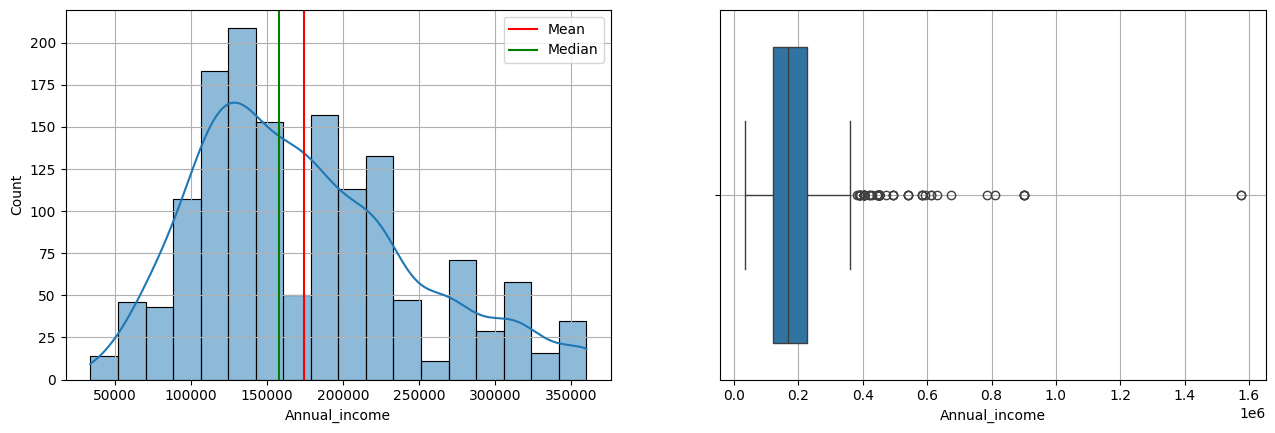

In [75]:
# Verifying by plotting the distribution and box plot after handling outlers

plt.subplot(1,2,1)
sns.histplot(data=final_scaled_df, x='Annual_income',kde=True)
plt.axvline(x=final_scaled_df['Annual_income'].mean(),color="red",label="Mean")
plt.axvline(x=final_scaled_df['Annual_income'].median(),color="green",label="Median")
plt.grid()
plt.legend()

plt.subplot(1,2,2)  # nrows=1, ncols=2
sns.boxplot(data=df, x='Annual_income')

plt.subplots_adjust(right=2.0)
plt.grid()
plt.show()

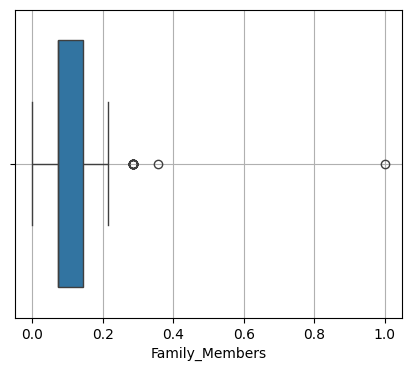

In [76]:
plt.figure(figsize =(5,4))

sns.boxplot(data=final_scaled_df , x='Family_Members')

plt.grid()
plt.show()

In [77]:
final_scaled_df = final_scaled_df[final_scaled_df['Family_Members'] < 0.8]

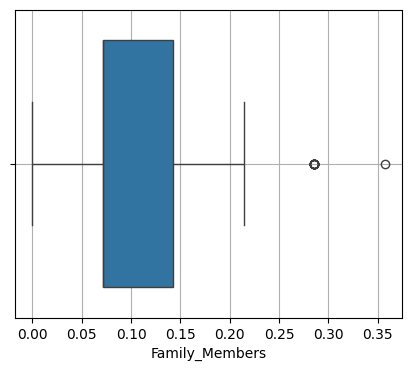

In [78]:
plt.figure(figsize =(5,4))

sns.boxplot(data=final_scaled_df , x='Family_Members')

plt.grid()
plt.show()

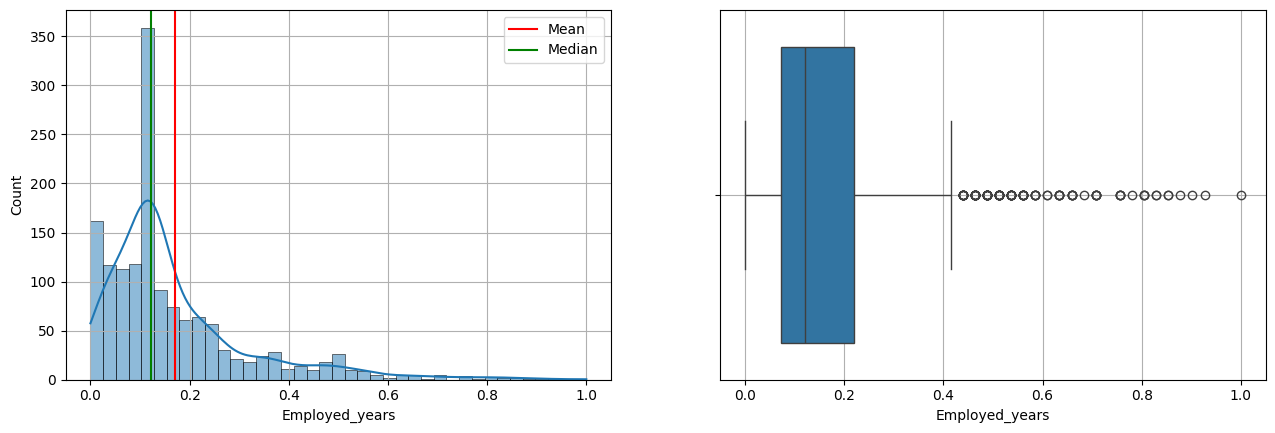

In [79]:
plt.subplot(1,2,1)
sns.histplot(data=final_scaled_df, x='Employed_years',kde=True)
plt.axvline(x=final_scaled_df['Employed_years'].mean(),color="red",label="Mean")
plt.axvline(x=final_scaled_df['Employed_years'].median(),color="green",label="Median")
plt.legend()
plt.grid()

plt.subplot(1,2,2)
sns.boxplot(data=final_scaled_df, x='Employed_years')

plt.subplots_adjust(right=2.0)
plt.grid()
plt.show()

In [80]:
Q1 = np.percentile(final_scaled_df['Employed_years'], 25 , interpolation='midpoint')
Q3 = np.percentile(final_scaled_df['Employed_years'], 75 ,interpolation='midpoint')

IQR = Q3-Q1

In [81]:
# checking for upper limit value

upper_limit = Q3+1.5*IQR

upper_limit

0.4390243902439024

In [82]:
final_scaled_df = final_scaled_df[final_scaled_df['Employed_years'] < upper_limit]

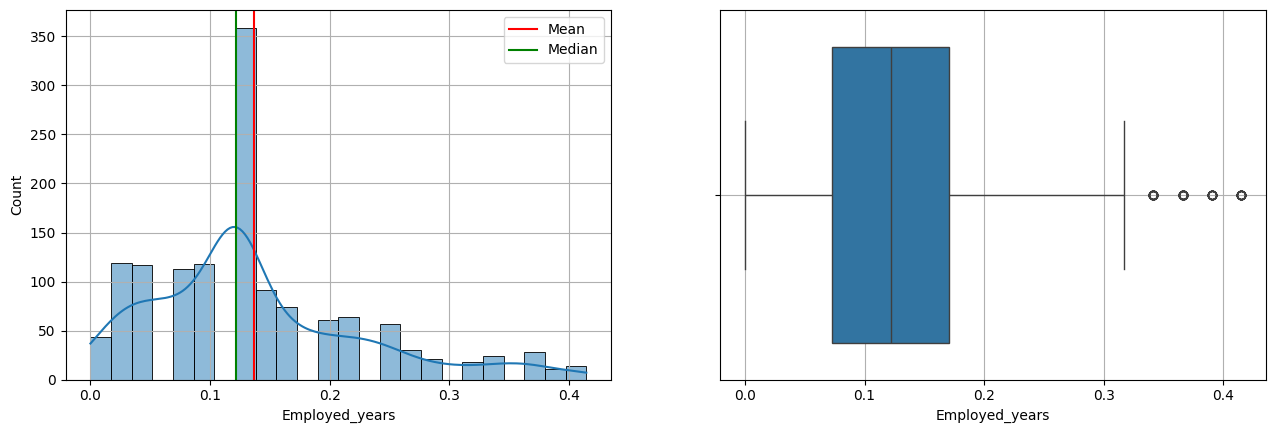

In [83]:
# verifying the distribution and box plot after handling outlers

plt.subplot(1,2,1)
sns.histplot(data=final_scaled_df, x='Employed_years',kde=True)
plt.axvline(x=final_scaled_df['Employed_years'].mean(),color="red",label="Mean")
plt.axvline(x=final_scaled_df['Employed_years'].median(),color="green",label="Median")
plt.legend()
plt.grid()

plt.subplot(1,2,2)
sns.boxplot(data=final_scaled_df, x='Employed_years')

plt.subplots_adjust(right=2.0)
plt.grid()
plt.show()

**Transformation**

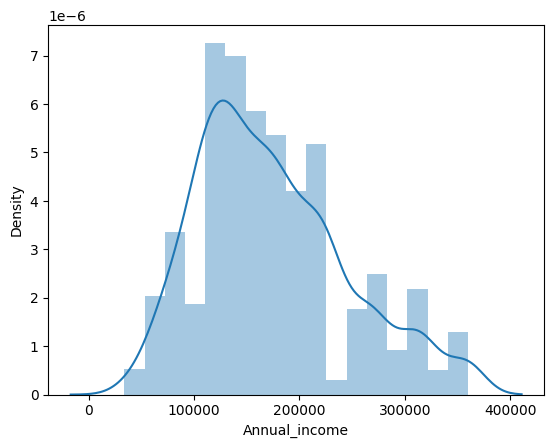

In [84]:
sns.distplot(final_scaled_df['Annual_income']);

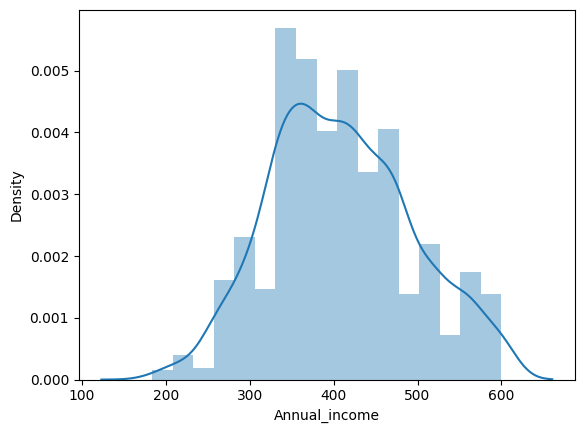

In [85]:
sns.distplot(np.sqrt(final_scaled_df['Annual_income']));

In [86]:
final_scaled_df['Annual_income'] = np.log(final_scaled_df['Annual_income'])
final_scaled_df

Annual_income  Work_Phone  label  GENDER_M  Car_Owner_Y  \
0         12.100712           0      1         1            1   
1         12.660328           1      1         0            1   
2         12.660328           1      1         0            1   
3         12.022751           1      1         0            1   
4         12.660328           1      1         0            1   
...             ...         ...    ...       ...          ...   
1543      12.022751           0      0         0            0   
1544      12.323856           0      0         0            0   
1545      12.100712           0      0         1            1   
1546      12.506177           1      0         1            1   
1547      12.323856           0      0         0            1   

      Propert_Owner_Y  Type_Income_Pensioner  Type_Income_State servant  \
0                   1                    1.0                        0.0   
1                   0                    0.0                        0.0   
2                   0                    0.0                        0.0   
3                   0                    0.0                        0.0   
4                   0                    0.0                        0.0   
...               ...                    ...                        ...   
1543                1                    0.0                        0.0   
1544                0                    0.0                        0.0   
1545                1                    0.0                        0.0   
1546                0                    0.0                        0.0   
1547                1                    0.0                        0.0   

      Type_Income_Working  Marital_status_Married  ...  \
0                     0.0                     1.0  ...   
1                     0.0                     1.0  ...   
2                     0.0                     1.0  ...   
3                     0.0                     1.0  ...   
4                     0.0                     1.0  ...   
...                   ...                     ...  ...   
1543                  0.0                     1.0  ...   
1544                  0.0                     0.0  ...   
1545                  1.0                     1.0  ...   
1546                  1.0                     0.0  ...   
1547                  1.0                     1.0  ...   

      Occupation_Realty agents  Occupation_Sales staff  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       1   
4                            0                       0   
...                        ...                     ...   
1543                         0                       0   
1544                         0                       0   
1545                         0                       0   
1546                         0                       0   
1547                         0                       0   

      Occupation_Secretaries  Occupation_Security staff  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   
...                      ...                        ...   
1543                       0                          0   
1544                       0                          0   
1545                       0                          0   
1546                       0                          0   
1547                       0                          0   

      Occupation_Waiters/barmen staff       Age  EDUCATION  CHILDREN  \
0                                   0  0.638298       0.50  0.000000   
1                                   0  0.340426       0.50  0.000000   
2    

# **Model Building**

# **Splitting the dataset into train and test**

In [87]:
X = final_scaled_df.drop(columns=['label'])
y = final_scaled_df['label']


from imblearn.over_sampling import SMOTE

oversample = SMOTE()

X, y = oversample.fit_resample(X, y)

In [88]:
y.value_counts()

1    1215
0    1215
Name: label, dtype: int64

In [89]:
# train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=10)

In [90]:
X_train.shape

(1944, 39)

In [91]:
X_test.shape


(486, 39)

In [92]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

# Logistic Regression, Decision Tree, Random Forest, XGBoost, Support Vector Machine, and K-Nearest Neighbors with specified settings for later use in a machine learning workflow. Each classifier serves different purposes and may be suitable for specific types of datasets or problems.

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score ,roc_auc_score

# classifiers
log_reg = LogisticRegression(max_iter=1000, random_state=10)
dtc = DecisionTreeClassifier(random_state=10)
rfc = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=10, use_label_encoder=False, eval_metric='logloss')
svc = SVC(random_state=10)
knn = KNeighborsClassifier()

In [94]:
# Dictionary to store results
results = {}

# classifiers
classifiers = [('Logistic Regression', log_reg),
               ('Decision Tree', dtc),
               ('Random Forest', rfc),
               ('XGBoost', xgb),
               ('Support Vector Machine', svc),
               ('K-Nearest Neighbors', knn)]

# Train, predict, and store results
for name, clf in classifiers:
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc_test = roc_auc_score(y_test, y_pred)

    results[name] = [accuracy, precision, recall, f1 , roc_auc_test]

In [95]:
results_final_scaled_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC Score']).T
results_final_scaled_df

Accuracy  Precision    Recall  F1-Score  ROC AUC Score
Logistic Regression     0.728395   0.733051  0.714876  0.723849       0.728340
Decision Tree           0.915638   0.900398  0.933884  0.916836       0.915713
Random Forest           0.979424   0.975410  0.983471  0.979424       0.979440
XGBoost                 0.971193   0.975000  0.966942  0.970954       0.971176
Support Vector Machine  0.890947   0.876494  0.909091  0.892495       0.891021
K-Nearest Neighbors     0.858025   0.789298  0.975207  0.872458       0.858505

#  **Model Selection**

# **XGBOOST**

# XGBOOST

# Performance and Accuracy: XGBoost consistently demonstrated superior
# performance in terms of accuracy, precision, and recall when compared to other models on the dataset.

# Interpretability and Feature Importance: XGBoost provides clear insights into
# the significance of different features in making predictions.


In [96]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

<Figure size 600x600 with 0 Axes>

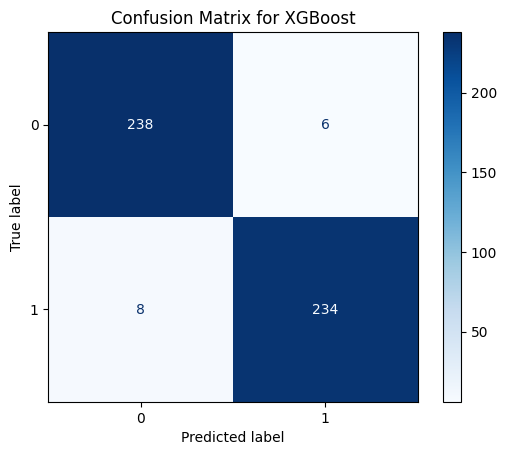



Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       244
           1       0.97      0.97      0.97       242

    accuracy                           0.97       486
   macro avg       0.97      0.97      0.97       486
weighted avg       0.97      0.97      0.97       486



In [97]:
# Predict using the trained XGBoost model
y_pred_xgb = xgb.predict(X_test_scaled)

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb.classes_)
plt.figure(figsize=(6,6))
disp.plot(cmap='Blues', values_format='.0f')
plt.title("Confusion Matrix for XGBoost")
plt.grid(False)
plt.show()
print("\n")
# Classification Report
print("Classification Report for XGBoost:\n")

print(classification_report(y_test, y_pred_xgb))

# **Hyperparameter Tuning**

# It employs GridSearchCV to find the optimal hyperparameters based on accuracy,

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
# the parameter grid

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [50, 100, 150, 200],
    'subsample': [0.8, 0.9, 1],
    'colsample_bytree': [0.8, 0.9, 1]
}

# initialize GridSearchCV
clf_xgb = XGBClassifier(random_state=10, use_label_encoder=False, eval_metric='logloss')

grid_search = GridSearchCV(clf_xgb, param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

print(grid_search.best_params_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 150, 'subsample': 1}


# **Testing the Model**



# trains it on scaled training data, and predicts outcomes on a test set. Subsequently, it calculates and prints key classification metrics, including accuracy, precision, recall, F1-score, and ROC AUC score, providing a comprehensive evaluation of the model's performance.

In [100]:
# Initialize the XGBoost classifier with the best parameters

xgb_best = XGBClassifier(
    colsample_bytree=1,
    learning_rate=0.1,
    max_depth=6,
    n_estimators=200,
    subsample=0.9,
    random_state=10,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model
xgb_best.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_best = xgb_best.predict(X_test_scaled)

# Calculate and print the metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best)

print(f"Accuracy after Hyperparameter Tuning: {accuracy_best}")
print(f"Precision after Hyperparameter Tuning: {precision_best}")
print(f"Recall after Hyperparameter Tuning: {recall_best}")
print(f"F1-Score after Hyperparameter Tuning: {f1_best}")
print(f"ROC AUC Score after Hyperparameter Tuning: {roc_auc_best}")

Accuracy after Hyperparameter Tuning: 0.9629629629629629
Precision after Hyperparameter Tuning: 0.9705882352941176
Recall after Hyperparameter Tuning: 0.9545454545454546
F1-Score after Hyperparameter Tuning: 0.9625
ROC AUC Score after Hyperparameter Tuning: 0.9629284649776454


# providing a snapshot of a machine learning model's performance by depicting the true positive, true negative, false positive, and false negative predictions.

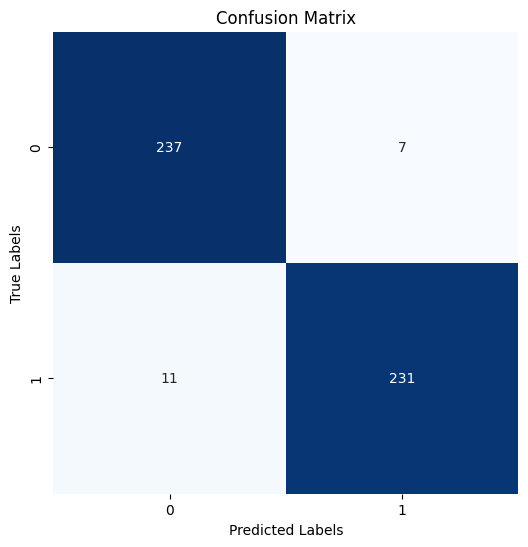

In [101]:
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Visualize the confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

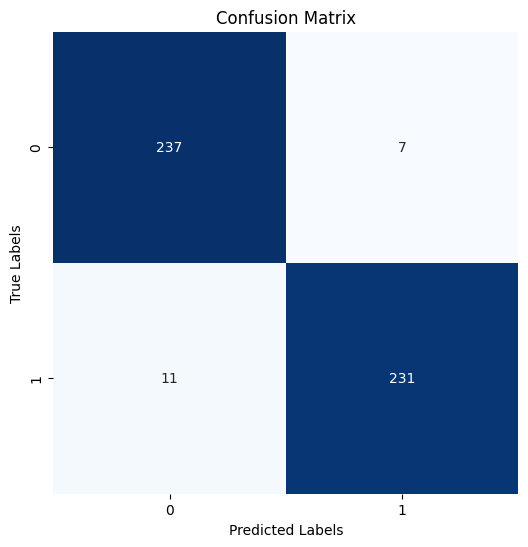

In [102]:
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Visualize the confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [103]:
# xgb_best.save_model('C:/Users\Lenovo\Desktop\xgboost_model.pk777')

# **Feature Importance**

# XGBoost to calculate and visualize feature importance in a machine learning project. Feature importance represents the contribution of each feature to the model's predictive performance.

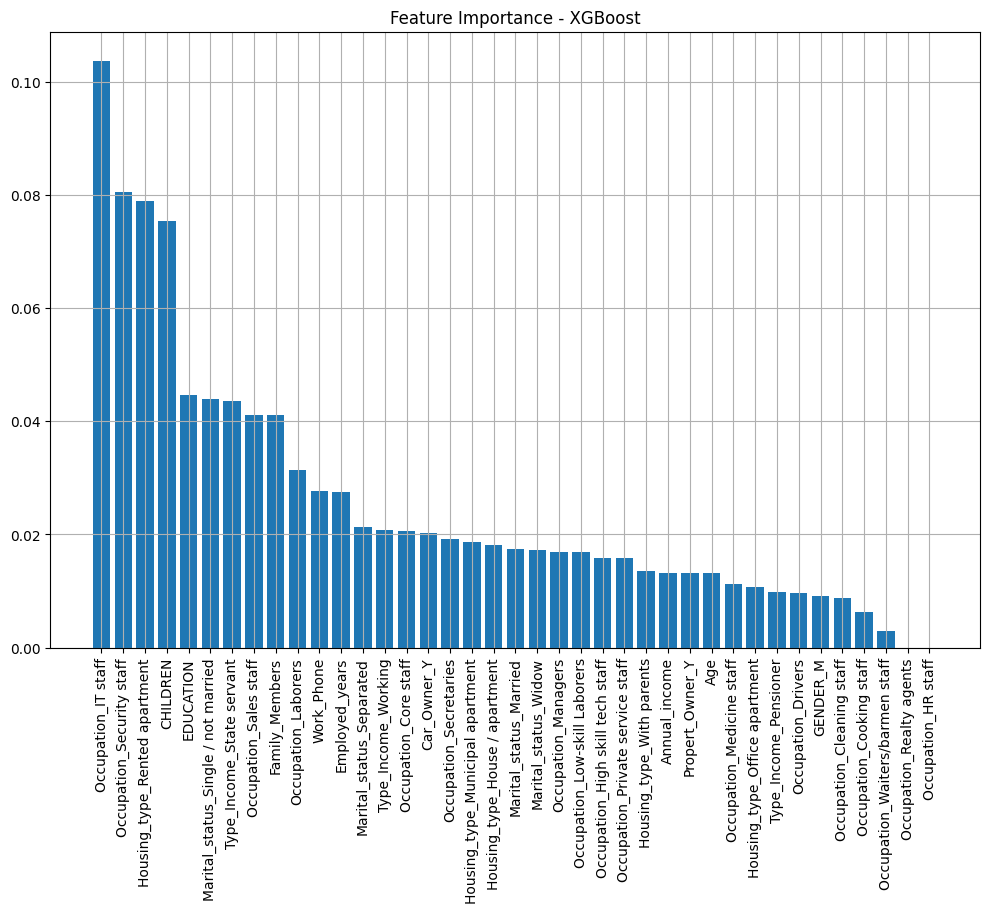

In [104]:
feature_importances = xgb.feature_importances_

# Sort the feature importances in descending order and get the indices


sorted_indices = np.argsort(feature_importances)[::-1]

# Ploting feature importances
plt.figure(figsize=(12, 8))

plt.title("Feature Importance - XGBoost")
plt.bar(X.columns[sorted_indices], feature_importances[sorted_indices])
plt.xticks(rotation=90)
plt.grid()
plt.show()




# **Conclusion**

the model seems to be performing well. The **accuracy** of the model is 0.96, which means that the model is able to correctly predict credit card approvals good of the time. The **precision** of the model is 0.97, which means that when the model predicts that a credit card application will be approved. The **recall** of the model is 0.95, which means that the model is able to correctly identify good of the credit card applications that should be approved. The **F1-score** of the model is 97, which is a weighted average of the precision and recall. Finally, the ROC AUC score of the model is good.